<a href="https://colab.research.google.com/github/jtwang99/AIA/blob/master/JT_Titanic_0112_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 手把手資料分析(上)

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np

#inference: https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

## 資料讀取

In [0]:
from google.colab import files

uploads = files.upload()
df =  pd.read_csv('train.csv') # 第一份資料
df_test  = pd.read_csv('test.csv') # 第二份資料

In [0]:
# 查看資料本身
print("data set shape: ", df.shape) # 看有幾個rows & columns
df.head() # 顯示前5rows

data set shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 欄位解釋：

### Survived：是否存活
0 = 死亡，1 = 存活

### Pclass：座艙等級
1 = 1st，2 = 2nd，3 = 3rd

---
### Age：年齡
如果年齡為估計值，則以xx.5顯示

---
### SibSp：Sibling + Spouse
在船上同為兄弟姊妹或配偶的數目

---
### Parch：Parents + children
在船上同為家族的父母或小孩的數目 

---
### Fare
船票價格

---
### Cabin
船艙號碼

---
### Embarked
登船口岸：S = Southampton，C = Cherbourg，Q = Queenstown

# 觀察各個欄位數量及型態

## 第一份資料`df`
`df.info()`函數可以顯示每個欄位的數量以及型態

In [0]:
'''
請觀察每個欄位的數量是否相同，數量不同的欄位表示有缺失值
Cabin, Age, Embarked 有缺失值 -> 要補值
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 第二份資料`df_test`

In [0]:
print("testing set shape: ", df_test.shape ) # 少一欄位 --> 這份是要來預測的，故沒有Survived欄位
df_test.head()
# Cabin > Age are incomplete in case of test dataset 
# Cabin & Age 具有缺值

testing set shape:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 觀察各個類別數量

In [0]:
# 計算量
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

# 平均數

In [0]:
'''
平均年齡
'''
df["Age"].mean()

29.69911764705882

# 中位數

In [0]:
'''
年齡中位數，位在資料中第50%的那一筆資料年齡是多少
'''
df["Age"].median()

28.0

# 變異數

In [0]:
'''
年齡變異數
'''
df.var() 

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

# 標準差

In [0]:
'''
年齡標準差
'''
df.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

## 顯示所以數值型欄位的統計量

使用`df.describe()`可以一次性得到所有數值型欄位的基本統計量

* count: 數量
* mean: 平均數
* std: 標準差
* min: 最小值
* 25%: 第一四分位數，位在資料中第25%的那一筆資料年齡是多少
* 50%: 第二四分位數，又稱中位數，位在資料中第50%的那一筆資料年齡是多少
* 75%: 第三四分位數，位在資料中第75%的那一筆資料年齡是多少
* max: 最大值

In [0]:
#observe the numerical data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

In [0]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.5)

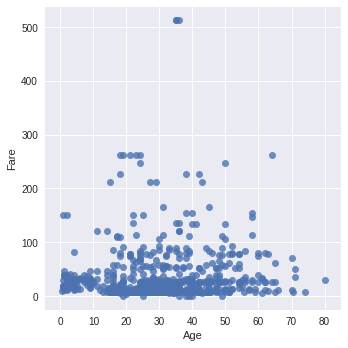

In [0]:
sns.set(style='darkgrid')
# 畫出 scatter plot --> lmplot
sns.lmplot(x = "Age", y = "Fare", data = df, fit_reg=False)

# 動手試試看(1)

### 參考上方的Code做出存活率與座艙等級的散佈圖
Tips:
* 請找出存活率以及座艙等級在資料集的名稱是什麼
* 畫出存活率與座艙等級的散步

In [0]:
"""type between this"""



"""type between this"""

'type between this'

# Histograms(直方圖)

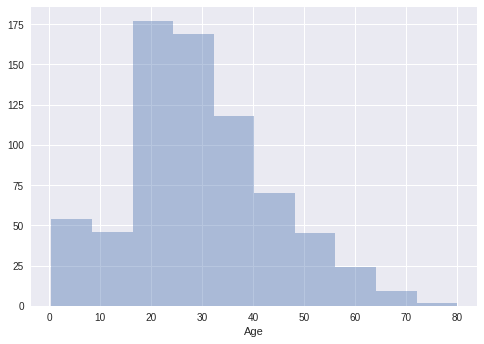

In [0]:
sns.distplot(df["Age"].dropna(), bins = 10, kde = False) #右偏

# 動手試試看(2)

### 參考年齡的 Code 做出票價的分佈圖

Tips:
* 請找出票價在資料集的名稱是什麼
* 票價沒有 缺失值`Na` 值，故請把.dropna()移除
* 把kde = False 移除試試看


In [0]:
sns.set(style='white')
"""type between this"""


"""type between this"""


'type between this'

# 比較年齡在不同資料間的直方圖

比較年齡在不同資料中的分佈

* `plt.subplots(nrow=2)`: 指定一張空白的基底，裡面可以放兩張子圖
* `ax=axes[0]`: 表示圖要畫在第一個位置

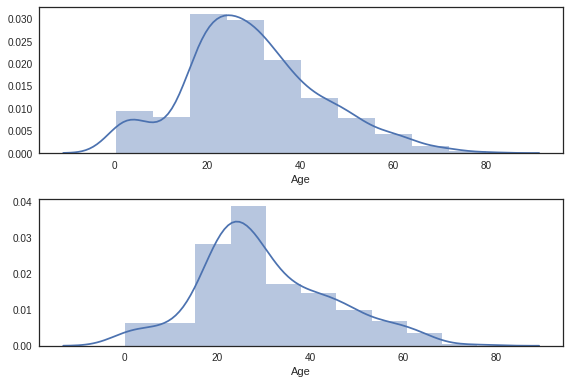

In [0]:
fig, axes = plt.subplots(nrows=2)
sns.distplot(df.Age.dropna(),bins = 10, ax= axes[0])
sns.distplot(df_test.Age.dropna(), bins = 10, ax= axes[1])
plt.tight_layout()

# 箱型圖(盒鬚圖)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


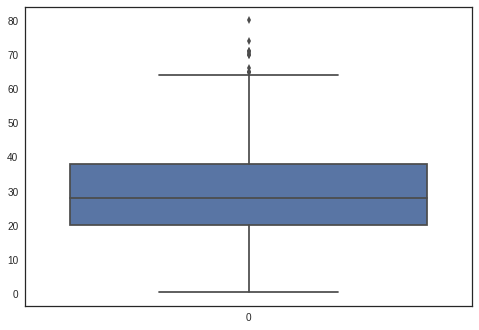

In [0]:
sns.boxplot(data = df["Age"])

# 動手試試看 (3)

### 參考以上的code做出 `df`, `df_test` 兩個資料及年齡的盒狀比較圖


Tips:
* 請找出年齡在資料集的名稱是什麼
* 請使用`plt.subplots()`畫出兩張子圖

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


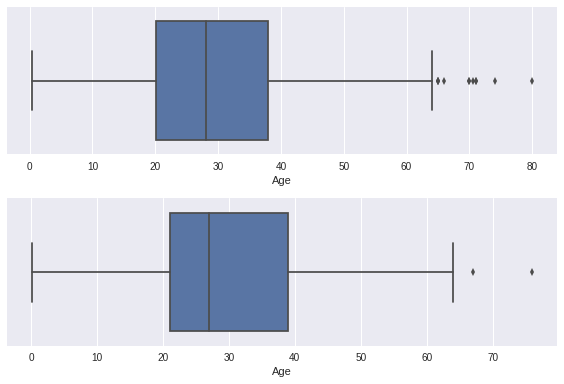

In [0]:
fig, axes = plt.subplots(nrows=2)
"""type between this"""



"""type between this"""
plt.tight_layout() #自動排版

# 類別型資料

In [0]:
# observe the categorical data
df.describe(include=['O']) # string type data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",male,CA. 2343,G6,S
freq,1,577,7,4,644


# Bar plot(長條圖)

長條圖：顯示類別型變數的數量

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


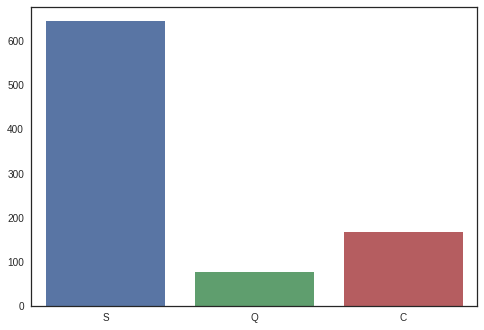

In [0]:
# 統計3個類別的數量
size = [sum(df.Embarked == "S"), sum(df.Embarked == "Q"), sum(df.Embarked == "C")]
# 
sns.barplot(x = ["S", "Q", "C"], y = size)

# 動手試試看 (4)

### 參考上一頁的 Code 做出 X軸為男女性乘客數量，Y軸為[男性，女性]的 Bar plot

Tips:

* 請找出年齡在資料集的變數名稱是什麼?
* 觀察一下如果要分別總合男性與女性，應該要使用  `df.Sex=='xxx'`

In [0]:
"""type between this"""



"""type between this"""

'type between this'

# Pie charts (圓餅圖)

圓餅圖能夠顯示一個變數中每個類別的比例

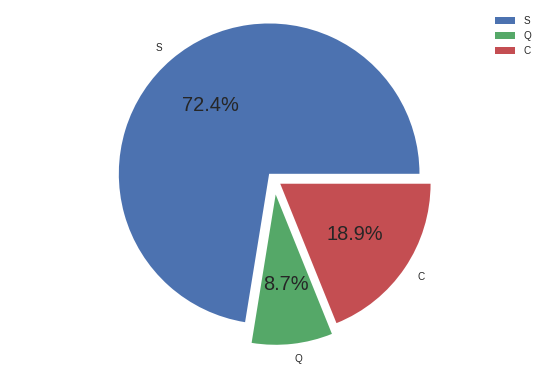

In [0]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0
size = [sum(df.Embarked == "S"), sum(df.Embarked == "Q"), sum(df.Embarked == "C")]
explode = (0.05, 0.1, 0.05)
plt.pie(size, labels=["S","Q","C"],autopct='%1.1f%%',explode=explode)
plt.axis('equal')
plt.legend(labels = ["S","Q","C"], loc= "best")
plt.tight_layout()
plt.show()

# Feature engineering 

# Pclass vs. Survived rate

以`plt.hlines`在圖上增加平均線

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


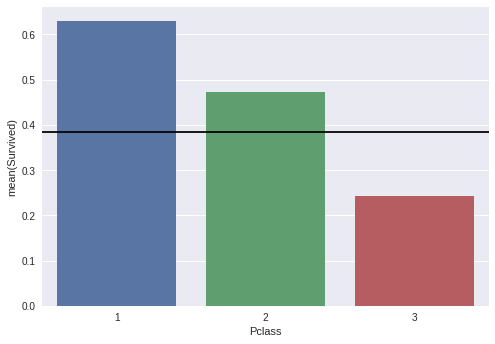

In [0]:
sns.set(style='darkgrid')

sns.barplot(x='Pclass',y='Survived', data=df, ci=None)
plt.hlines(df.Survived.mean(), xmin = -0.5, xmax = 2.5)

# 新增新欄位 - who

以下程式碼會跑久一點

In [0]:
#新增欄位，Who
df["who"] = None # 先新增一個新的欄位，裡面為None
for index in range(len(df)):
    if np.isnan(df.loc[index, "Age",]): # 在年齡中有缺失值，另外處理
        if  df.loc[index, "Sex"] == "male": # 當Sex為male時，將who賦予為man
            df.loc[index, "who"] = "man"
        else:
            df.loc[index, "who"] = "woman" # 當Sex不為male時，將who賦予為woman
    
    elif df.loc[index, "Age"] < 15: # 當年齡小於15歲時，將who賦予為child
        df.loc[index, "who"] = "child"
    else: # 當年齡大於等於15歲時，執行以下條件
        if  df.loc[index, "Sex"]== "male": # 當Sex為male時，將who賦予為man
            df.loc[index, "who"] = "man"
        else:
            df.loc[index,"who"] = "woman" # 當Sex不為male時，將who賦予為woman

In [0]:
df.iloc[6:9,:] # 顯示6~8筆

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,woman


# Barplot with ‘who’ column

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


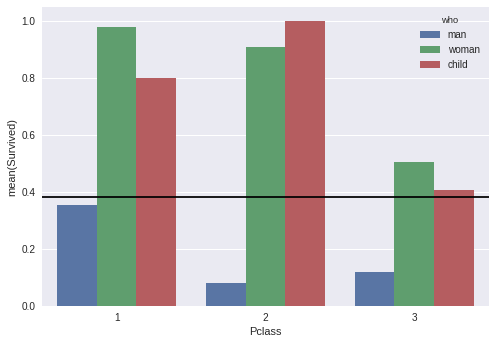

In [0]:
sns.barplot(y='Survived',x='Pclass',data=df, hue='who',ci=None)
plt.hlines(df.Survived.mean(), xmin = -0.5, xmax = 2.5)

# Sex vs. Age

* 男性小孩存活比重明顯比較高，而女性小孩的則比較平均
* 不管是男性還是女性，存活的人的年紀明顯比死亡的人還要老一點

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


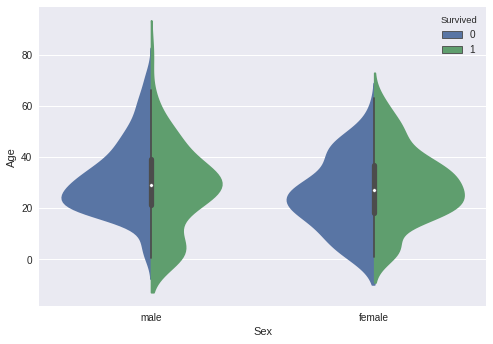

In [0]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

# Pclass vs.Survived

* Class 1 有相對少的小孩，老人比較多，年輕人相對於老人都存活
* Class 2 小孩幾乎全部都存活了
* Class 3 多數小孩存活

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


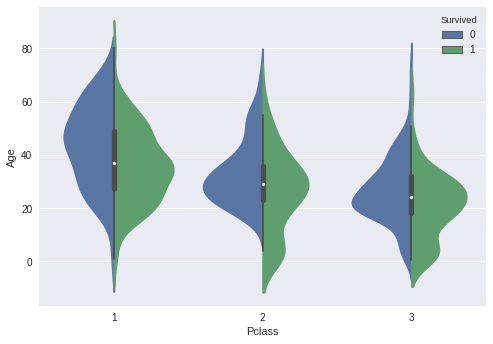

In [0]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

# 動手試試看(5)

請參考前兩頁程式碼，試著做出以下的圖，並想想看，能夠看出什麼有趣的Insight。 

Tips: 
* 此次的圖沒有分類，左右必為對稱。

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


'type between this'

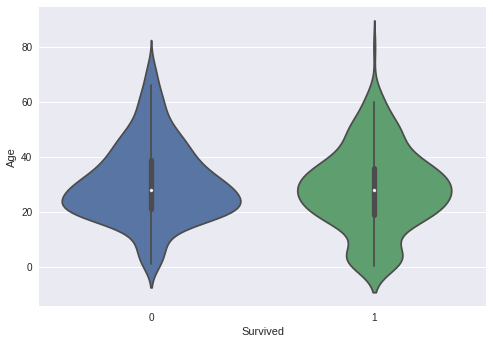

In [0]:
"""type between this"""



"""type between this"""

# 文字資料處理

切出所有姓名的尊稱

In [0]:
#取出Title
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
df.head() # 顯示前五筆

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,Mr


# 將尊稱分為五大類

* `Master`: 貴賓。
* `Mr`
* `Mlle, Ms` $\rightarrow$ `Miss`: 將`Mlle`與`Ms`皆視為單身女性`Miss`。
* `Mme` $\rightarrow$ `Mrs`: 將`Mme`視為`Mrs`。
* 其餘皆視為`Rare`。

In [0]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major',
                                   'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')


# 每個尊稱平均準確率

In [0]:
#觀察每個Title的生存率
title = df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# Title vs.  Survival rate

In [0]:
#查看title內容
title

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# 動手試試看(6)

### 參考上面的結果，畫出長條圖：
* 確認x軸為尊稱Title，y軸為存活率
* 觀察每個尊稱的存活率，是否符合女性存活率較高的現象

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


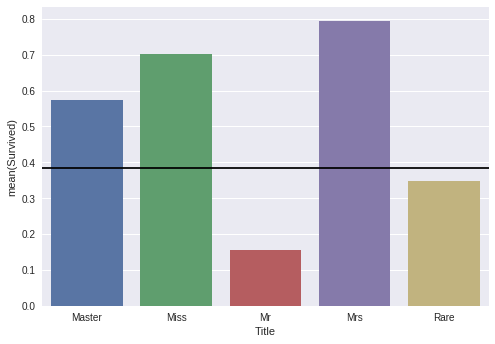

In [0]:
"""type between this"""


"""type between this"""

plt.hlines(df.Survived.mean(), xmin = -0.5, xmax = 4.5)